### Описательная статистика

In [1]:
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as sts

In [2]:
df = pd.read_csv('datasets/gender_classification.csv')
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [3]:
df_selected = df[['forehead_width_cm', 'long_hair', 'gender']]
df_selected.head(10)

,forehead_width_cm,long_hair,gender
0,11.8,1,Male
1,14.0,0,Female
2,11.8,0,Male
3,14.4,0,Male
4,13.5,1,Female
5,13.0,1,Male
6,15.3,1,Male
7,13.0,0,Female
8,11.9,1,Female
9,12.1,1,Female


# Центральные метрики
Центральные метрики показывают центр или средние значения наборов данных.
1.	Среднеарифметическое;
2.	Средневзвешенное;
3.	Медиана;
4.	Мода.

#### Математическое ожидание
**Математи́ческое ожида́ние** — одно из важнейших понятий в теории вероятностей, означающее среднее (взвешенное по вероятностям возможных значений) значение случайной величины. В случае непрерывной случайной величины подразумевается взвешивание по плотности распределения.

На практике математическое ожидание обычно оценивается как среднее арифметическое наблюдаемых значений случайной величины (выборочное среднее, среднее по выборке). Доказано, что при соблюдении определенных слабых условий (в частности, если выборка является случайной, то есть наблюдения являются независимыми) выборочное среднее стремится к истинному значению математического ожидания случайной величины при стремлении объема выборки (количества наблюдений, испытаний, измерений) к бесконечности.

In [4]:
print('Ширина лба:', st.mean(df['forehead_width_cm']))
print('Высота лба:', st.mean(df['forehead_height_cm']))

Ширина лба: 13.181483703259348
Высота лба: 5.946310737852429


### Средневзвешенное
Также его называеют средневзвешенным арифметическим или средневзвешенным значением, является обобщением среднего арифметического, которое позволяет вам определить относительный вклад каждой точки данных в результат.

In [5]:
w = [0.1, 0.2, 0.3, 0.25, 0.15]
df_head = df.head(5)
print('Ширина лба:', np.average(df_head['forehead_width_cm'], weights=w))
print('Высота лба:', np.average(df_head['forehead_height_cm'], weights=w))

Ширина лба: 13.145000000000001
Высота лба: 5.99


### Медиана
**Медиана** - это такое значение, что ровно половина выборки меньше него, а ровно половина - больше.

In [6]:
print('Ширина лба:', 'aver:', st.median(df['forehead_width_cm']), 'low:', st.median_low(df['forehead_width_cm']), 'high:', st.median_high(df['forehead_width_cm']))
print('Высота лба:', 'aver:', st.median(df['forehead_height_cm']), 'low:', st.median_low(df['forehead_height_cm']), 'high:', st.median_high(df['forehead_height_cm']))

Ширина лба: aver: 13.1 low: 13.1 high: 13.1
Высота лба: aver: 5.9 low: 5.9 high: 5.9


### Мода
Мода - значение, которое наиболее часто встречается в выборке

In [7]:
print('Ширина лба:', st.mode(df['forehead_width_cm']))
print('Высота лба:', st.mode(df['forehead_height_cm']))

Ширина лба: 12.0
Высота лба: 5.7


### Минимум и максимум

In [8]:
print('Ширина лба:', 'min:', np.min(df['forehead_width_cm']), 'max:', np.max(df['forehead_width_cm']))
print('Высота лба:', 'min:', np.min(df['forehead_height_cm']) , 'max:', np.max(df['forehead_height_cm']))

Ширина лба: min: 11.4 max: 15.5
Высота лба: min: 5.1 max: 7.1


## Метрики оценки вариативности данных
Центральных метрик недостаточно для описания данных. Практически всегда необходимы метрики оценки вариативности данных, которые количественно определяют разброс точек данных. В этом разделе вы узнаете, как определить и рассчитать следующие показатели:
1.	дисперсия;
2.	среднеквадратичное отклонение;
3.	смещение;
4.	процентили;
5.	диапазон;

### Дисперсия
Дисперсия - квадрат стандартного отклонения. Количественно определяет разброс данных. Численно показывает, как далеко точки данных от среднего значения.

Дисперсия позволяет нам понять, насколько сильно значения отклоняются от среднего.

In [9]:
print('Ширина лба:', st.pvariance(df['forehead_width_cm']))
print('Высота лба:', st.pvariance(df['forehead_height_cm']))

Ширина лба: 1.2254879805882455
Высота лба: 0.2929123041618431


### Стандартное отклонение
Стандартное отклонение выборки является еще одним показателем разброса данных. Он связан с оценкой дисперсией, поскольку стандартное отклонение есть положительным квадратный корень из оценки дисперсии.

Как и дисперсия, стандартное отклонение отражает разницу между всеми значениями и средним значением. Используя квадратный корень из дисперсии, стандартное отклонение измеряется в тех же единицах, что и значения
исходного набора данных.

Стандартное отклонение часто более удобно, чем дисперсия, потому что имеет ту же размерность, что и данные. Получив дисперсию, вы можете рассчитать стандартное отклонение с помощью библиотек Python.

In [10]:
print('Ширина лба:', st.pstdev(df['forehead_width_cm']))
print('Высота лба:', st.pstdev(df['forehead_height_cm']))

Ширина лба: 1.1070176062684123
Высота лба: 0.5412137324217144


### Квантиль (процентиль)
Квантиль (мужской род, ударение падает на последний слог) – значение, которое заданная случайная величина не превышает с фиксированной вероят- ностью. 0,25-квантиль (говорят квантиль уровня 0,25) – это значение, ниже которого будет лежать 25 % значений числового ряда, а выше – 75 % значений числового ряда.

Самым известным квантилем является 0,5-квантиль или медиана – значение, которое делит упорядоченный числовой ряд пополам, то есть ровно половина остальных значений больше него, а другая половина меньше его.

Каждый набор данных имеет три квартиля, которые являются процентилями, делящими набор данных на четыре части:

•	Первый квартиль — это образец 25-го процентиля. Он разделяет примерно 25% самых маленьких элементов от остальной части набора данных.

•	Второй квартиль — это образец 50-го процентиля или медиана. Приблизительно 25% элементов находятся между первым и вторым квартилями и еще 25% между вторым и третьим квартилями.

•	Третий квартиль — это образец 75-го процентиля. Он разделяет примерно 25% самых больших элементов от остальной части набора данных.

(Например, фраза «90-й процентиль массы тела у новорожденных мальчиков составляет 4 кг» означает, что 90 %  мальчиков рождаются с весом, меньшим либо равным 4 кг, а 10 % мальчиков рождаются с весом, большим 4 кг.)

Вы также можете использовать `np.percentile()` для определения любого процентиля в наборе данных. Например, вот так вы можете найти 5-й и 95-й процентили:
![img](https://drive.google.com/uc?id=1a8l2x1xxgPRrnAgvD-21L-hmPE2DQkF3)

5-й

In [11]:
print('Ширина лба:', np.percentile(df['forehead_width_cm'], 5))
print('Высота лба:', np.percentile(df['forehead_height_cm'], 5))

Ширина лба: 11.6
Высота лба: 5.1


95-й

In [12]:
print('Ширина лба:', np.percentile(df['forehead_width_cm'], 95))
print('Высота лба:', np.percentile(df['forehead_height_cm'], 95))

Ширина лба: 15.2
Высота лба: 6.9


25-й, 50-й, 75-й

In [13]:
print('Ширина лба:', np.percentile(df['forehead_width_cm'], [25, 50, 75]))
print('Высота лба:', np.percentile(df['forehead_height_cm'], [25, 50, 75]))

Ширина лба: [12.2 13.1 14. ]
Высота лба: [5.5 5.9 6.4]


### Размах

Разница между минимальным и максимальным значениями

In [14]:
print('Ширина лба:', max(df['forehead_width_cm'])-min(df['forehead_width_cm']))
print('Высота лба:', max(df['forehead_height_cm'])-min(df['forehead_height_cm']))

Ширина лба: 4.1
Высота лба: 2.0


### Корреляция

Взаимосвязь двух выборок друг от друга. Чтобы графически увидеть взаимосвязь двух переменных, необходимо построить точечный график зависимости друг от друга. Например, возьмем 2 параметра - ширина лба и гендер. Зависит ли гендер от ширина лба?

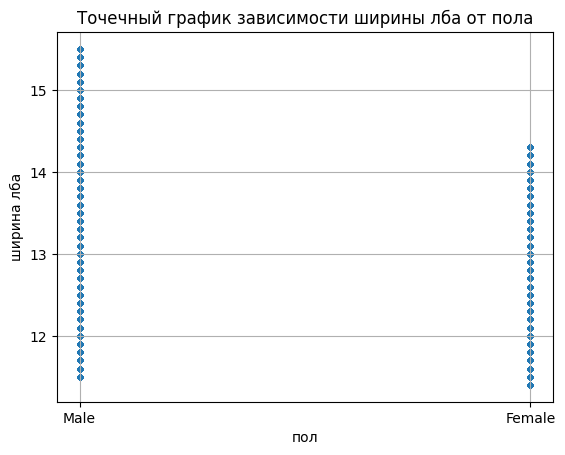

In [32]:
plt.xlabel('пол')
plt.ylabel('ширина лба')
plt.title('Точечный график зависимости ширины лба от пола')
plt.grid(True)
plt.scatter(df['gender'], df['forehead_width_cm'], marker='.')
plt.show()

Из графика видно, что только после определенного показателя значения ширины лба можно определить гендер

### Описательная статистика Pandas

In [16]:
df_ = df.drop(columns=['distance_nose_to_lip_long'])
df_.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000


### Корреляция Пирсона

1. Экспериментальные данные должны быть представлены в только в  интервальной шкале  или шкале отношений.
2. Распределение экспериментальных данных подчиняется нормальному закону.
3. Предполагается линейная зависимость между случайными величинами X и Y.

In [17]:
df['gender_num'] = (df['gender'] == 'Male').astype(int)
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_num
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,0
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,1
4,1,13.5,5.9,0,0,0,0,Female,0
5,1,13.0,6.8,1,1,1,1,Male,1
6,1,15.3,6.2,1,1,1,0,Male,1
7,0,13.0,5.2,0,0,0,0,Female,0
8,1,11.9,5.4,1,0,1,1,Female,0
9,1,12.1,5.4,0,0,0,0,Female,0


Коэффициент корреляции Пирсона: 0.3341250632120522


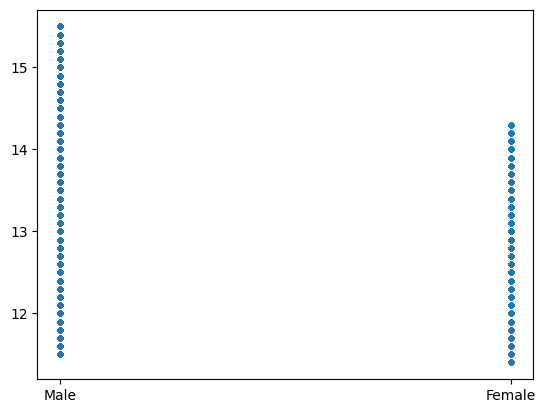

In [18]:
corr, p_value = pearsonr(df['gender_num'], df['forehead_width_cm'])
plt.scatter(df['gender'], df['forehead_width_cm'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.27719041906756764


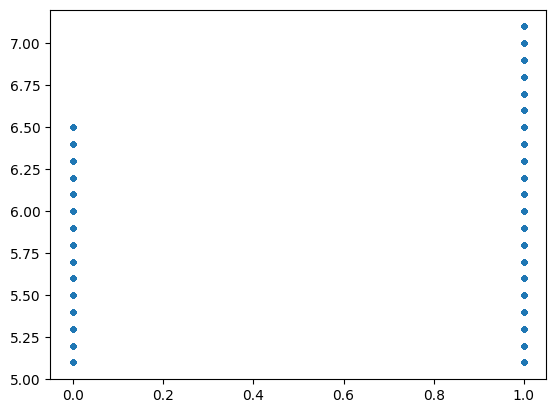

In [19]:
corr, p_value = pearsonr(df['gender_num'], df['forehead_height_cm'])
plt.scatter(df['gender_num'], df['forehead_height_cm'], marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Чтобы приступать к расчетам коэффициента корреляции r-Пирсона необходимо выполнение следующих условий:

*  Исследуемые переменные X и Y должны быть распределены нормально (делаем допущение, что переменные распределены нормально).
*  Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений.
*  Количество значений в исследуемых переменных X и Y должно быть одинаковым.

Чем коэффициент ближе к 0, тем более независимы переменные.

**Минусы коэффициента корреляции Пирсона:**
- Неустойчивость к выбросам.
- С помощью коэффициента корреляции Пирсона можно определить только силу линейной взаимосвязи между переменными, другие виды взаимосвязей выявляются методами регрессионного анализа.

### Корреляция Спирмана

При расчете коэффициента корреляции Спирмена требования к исходным данным менее строгие, а именно:
1. Данные могут быть представлены в порядковой, интервальной шкале или шкале отношений.
2. Допускается любой закон распределения случайных величин X и Y.
3. Между случайными величинами X и Y должна существовать монотонно-возрастающая или монотонно-убывающая зависимость.

In [20]:
cor, p_value = sts.spearmanr(df['gender_num'], df['forehead_width_cm'])
print(cor)

0.3130083630111466


In [21]:
cor, p_value = sts.spearmanr(df['gender_num'], df['forehead_height_cm'])
print(cor)

0.251226680540353


### Тау Кендалла

Коэффициент ранговой корреляции tau-Кендалла является альтернативой методу определения корреляции r-Спирмана. Он предназначен для определения взаимосвязи между двумя ранговыми переменными.

In [22]:
cor, p_value = sts.kendalltau(df['gender_num'], df['forehead_width_cm'])
print(cor)

0.25887774212220205


In [23]:
cor, p_value = sts.kendalltau(df['gender_num'], df['forehead_height_cm'])
print(cor)

0.2104611149827891


# Пример корелляции данных, загруженных с помощью pandas
Матрица корреляций

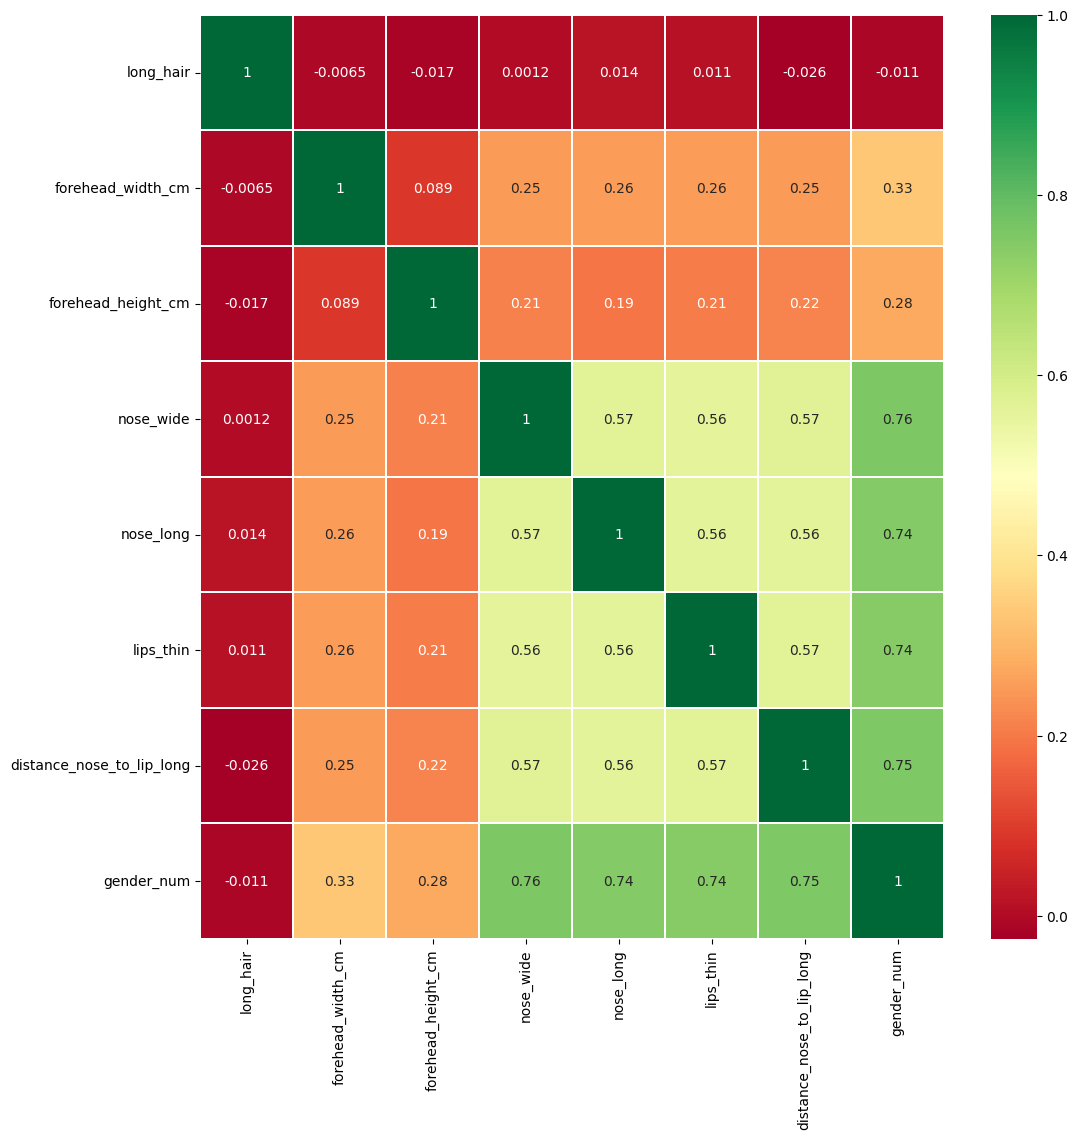

In [25]:
import seaborn as sns
df_ = df.drop(columns=['gender'])
sns.heatmap(df_.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

### Входные параметры:
* Параметры nose_long и lips_thin имею схожую корреляцию с другими параметрами и одинаково коррелируются с выходным параметром.
* Параметры forehead_width_cm и forehead_height_cm имею близкую корреляцию с другими параметрами и примерно одинаково коррелируются с выходным параметром.
### С выходным параметром:
* Слабая корреляция gender_num с : длиной волос и высотой лба
* Средняя корреляция (ниже среднего) gender_num с шириной лба
* Сильная корреляция gender_num с шириной носа

### Выбросы

In [38]:
df['gender_num'].isnull().sum()

0

In [39]:
df['forehead_width_cm'].isnull().sum()

0

In [40]:
df['forehead_height_cm'].isnull().sum()

0

Нулевых значений в колонках нет

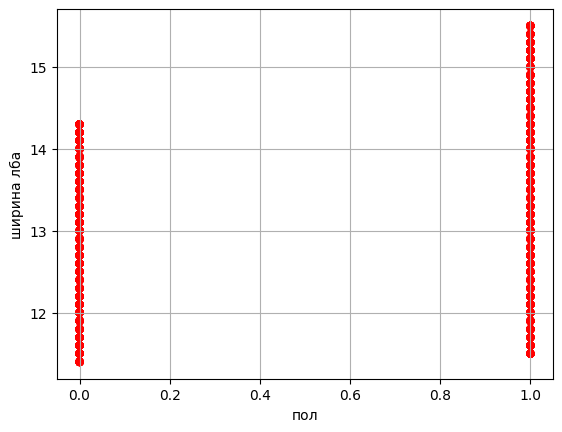

In [42]:
gen = df['gender_num']
forehead_width = df['forehead_width_cm']
fig, ax = plt.subplots()
ax.scatter(gen, forehead_width, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('пол')
plt.ylabel('ширина лба')
plt.show()

# Распределение

**Зададим нормальное распределение теоритически.**
Частотный график выборки y  (или график плотности вероятности).

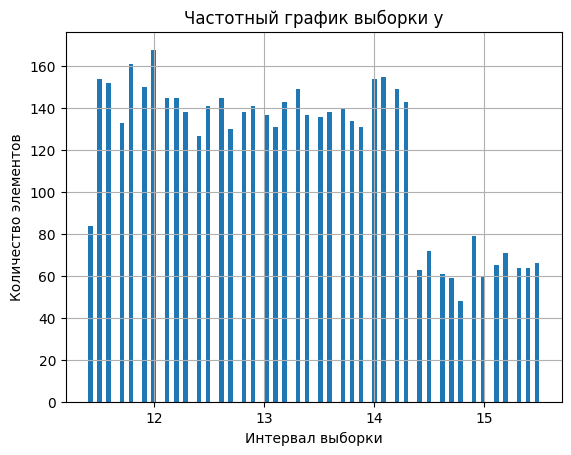

In [37]:
plt.hist(df['forehead_width_cm'],100)
plt.xlabel('Интервал выборки')
plt.ylabel('Количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

Построим графики функции плотности вероятности:

<Axes: xlabel='forehead_width_cm', ylabel='Density'>

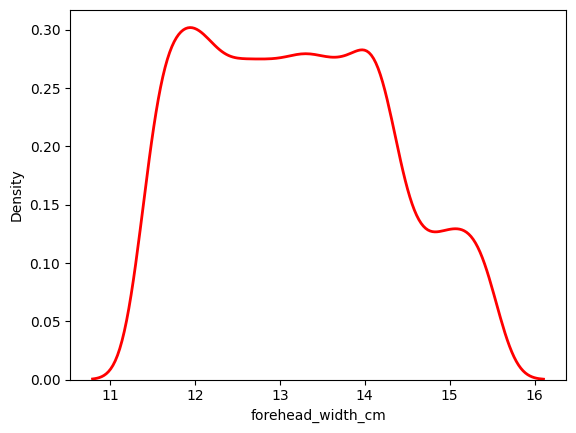

In [38]:
sns.kdeplot(data=df['forehead_width_cm'], color='red', linewidth=2)

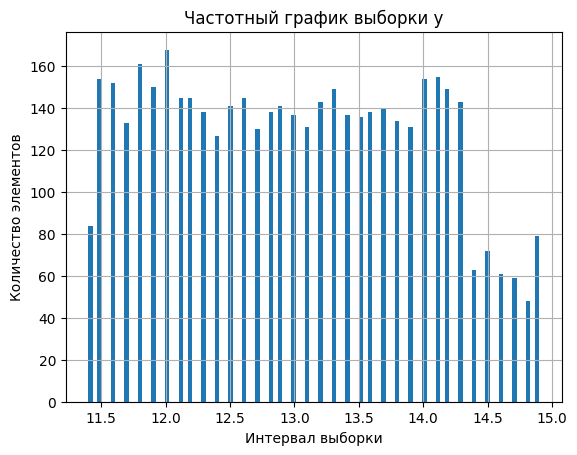

In [39]:
plt.hist(df.loc[df['forehead_width_cm'] < 15, 'forehead_width_cm'], 100)
plt.xlabel('Интервал выборки')
plt.ylabel('оличество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

<Axes: xlabel='forehead_width_cm', ylabel='Density'>

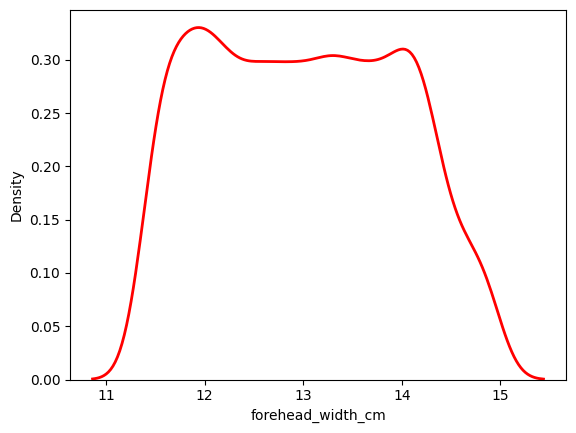

In [40]:
sns.kdeplot(data=df.loc[df['forehead_width_cm'] < 15, 'forehead_width_cm'], color='red', linewidth=2)

## Коэффициент островершинности, коэффициент эксцесса и коэффициент асимметрии

На практике для анализа распределения переменной и подбора преобразований, максимизирующих
нормальность, пользуются коэффициентом островершинности, или куртосисом (`kurtosis`), коэффициентом
эксцесса (`excess kurtosis`), коэффициентом асимметрии (`skewness`), строят гистограмму распределения, графики квантиль–квантиль и ящичковую диаграмму.

### Коэффициент островершинности (куртосис)

**Коэффициент островершинности, или куртосис (kurtosis)**, – это мера остроты пика в распределении случайной величины. Он характеризует распределение, в котором значения величины либо сосредоточены близко к среднему значению, либо, наоборот, распределены далеко от него.

Для стандартного нормального распределения коэффициент островершинности равен 3. На практике используют эту же формулу, но с вычитанием 3, чтобы коэффициент был равен 0.

<img width="550" height="150" src='https://drive.google.com/uc?id=1tyi-i6xc7rCLslN4MZfth3IJ5CSufKIT' />

И такой коэффициент называют уже коэффициентом эксцесса (excess kurtosis). Прилагательное excess здесь буквально означает «выходящий за рамки нормы». Это дает удобство интерпретации. Если коэффициент эксцесса положителен (коэффициент островершинности > 3), то распределение будет иметь острую вершину, мы имеем дело с островершинным распределением. Если коэффициент эксцесса отрицателен (коэффициент островершинности < 3), то распределение будет иметь пологую вершину, мы имеем дело с плосковершинным распределением. Если коэффициент эксцесса равен нулю (коэффициент островершинности равен 3), наше распределение является нормальным.

<img width="650" height="250" src='https://drive.google.com/uc?id=1HGSgBJzdOseF1DqxwSMRn1bQSQ3alAJ2' />

Ниже приведен график распределений с разным значением эксцесса.
<img  src='https://drive.google.com/uc?id=1Oet8x3Bynhrx_P2vIndDoD4RnT5SWDTS' />

In [43]:
print('Ширина лба:', sts.kurtosis(df['forehead_width_cm'], axis=0, fisher=True, bias=True))
print('Высота лба:', sts.kurtosis(df['forehead_height_cm'], axis=0, fisher=True, bias=True))
print('Пол:', sts.kurtosis(df['gender_num'], axis=0, fisher=True, bias=True))

Ширина лба: -0.930865697789264
Высота лба: -0.8492405071581102
Пол: -1.9999998400639738


При работе с параметрами forehead_width_cm и forehead_height_cm имеем дело с плосковершинным распределением, так как коэффициент эксцесса отрицателен

### Коэффициент асимметрии
**Коэффициент асимметрии, или скоса (skewness)**, – мера асимметрии распределения случайной величины. Он вычисляется по формуле:

<img width="450" height="150" src='https://drive.google.com/uc?id=1zo5Yxw4lerZQnV8-orihRu2jT5VwQ8Kz' />

 Если асимметрия близка к 0 (например, между -0,5 и 0,5), то набор данных считается относительно симметричным.

- Если у вас будет преобладание чисел меньше среднего,
вы получите отрицательный коэффициент асимметрии.
- Если у вас будет преобладание чисел больше среднего, вы получите положительный коэффициент асимметрии.
- Если у вас симметрия, числа взаимно скомпенсируют друг друга. Для стандартного нормального распределения коэффициент асимметрии равен нулю.

Если коэффициент асимметрии положителен, то распределение будет скошено вправо, если отрицателен, распределение будет скошено влево. При левосторонней асимметрии мода больше медианы, а медиана больше, чем среднее значение. При правосторонней асимметрии среднее значение больше
медианы, а медиана больше моды. Для нормального распределения мода, медиана и среднее значение одинаковы.

Рассчитаем асимметрию с помощью `scipy.stats.skew()`:

In [43]:
print('Ширина лба:', sts.skew(df['forehead_width_cm'], axis=0, bias=True))
print('Высота лба:', sts.skew(df['forehead_height_cm'], axis=0, bias=True))
print('Пол:', sts.skew(df['gender_num'], axis=0, bias=True))

Ширина лба: 0.24216884127602942
Высота лба: 0.2506634571052811
Пол: 0.00039992002399174707


Данный набор данный считается относительно симметричным, так как ассимметрия близка к 0

In [47]:
print('Ширина лба (мат. ожидание):', st.mean(df['forehead_width_cm']))
print('Ширина лба (медиана):', 'aver:', st.median(df['forehead_width_cm']), 'low:', st.median_low(df['forehead_width_cm']), 'high:', st.median_high(df['forehead_width_cm']))
print('Ширина лба (мода):', st.mode(df['forehead_width_cm']))

Ширина лба (мат. ожидание): 13.181483703259348
Ширина лба (медиана): aver: 13.1 low: 13.1 high: 13.1
Ширина лба (мода): 12.0


In [45]:
print('Высота лба (мат. ожидание):', st.mean(df['forehead_height_cm']))
print('Высота лба (медиана):', 'aver:', st.median(df['forehead_height_cm']), 'low:', st.median_low(df['forehead_height_cm']), 'high:', st.median_high(df['forehead_width_cm']))
print('Высота лба (мода):', st.mode(df['forehead_height_cm']))

Высота лба (мат. ожидание): 5.946310737852429
Высота лба (медиана): aver: 5.9 low: 5.9 high: 13.1
Высота лба (мода): 5.7


Для нормально распределенных данных асимметрия должна быть около нуля.
По данным ассиметрии и эксцесса можно сказать, что показатели "ширина лба (forehead_width_cm)" и "высота лба (forehead_height_cm)" относительно подчиняется нормальному закону распределения. Эксцесс близок к нормальному распределению, небольшая плосковершинность